# Pymaceuticals Inc.
---

### Analysis
-from the tumor volume vs time point for a mouse treated with Capomulin we can see that the size of the tumor is deacreasing through out time when treated with Capomulin as can be seen when treating mouse s185



In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_df= pd.merge(mouse_metadata, study_results, on = 'Mouse ID', )

# Display the data table for preview
combine_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice = combine_df['Mouse ID'].nunique()
print(number_mice)

249


In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combine_df[combine_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combine_df[combine_df['Mouse ID'].isin(duplicate_mice_ids)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice in the clean DataFrame.
number_mice2 = clean_df['Mouse ID'].nunique()
print(number_mice2)

248


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()

median= clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()

variance =clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()

sd = mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()

sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem

summary_df = pd.DataFrame ({
    'mean':mean,
    'median': median,
    'variance' :  variance,
    'standard deviation': sd, 
    'sem' : sem
    
}) 

summary_df





,mean,median,variance,standard deviation,sem
Drug Regimen,,,,,
Capomulin,4.994774,41.557809,24.947764,4.994774,<bound method GroupBy.sem of <pandas.core.grou...
Ceftamin,6.268188,51.776157,39.290177,6.268188,<bound method GroupBy.sem of <pandas.core.grou...
Infubinol,6.567243,51.820584,43.128684,6.567243,<bound method GroupBy.sem of <pandas.core.grou...
Ketapril,8.279709,53.698743,68.553577,8.279709,<bound method GroupBy.sem of <pandas.core.grou...
Naftisol,8.134708,52.509285,66.173479,8.134708,<bound method GroupBy.sem of <pandas.core.grou...
Placebo,7.821003,52.288934,61.168083,7.821003,<bound method GroupBy.sem of <pandas.core.grou...
Propriva,6.622085,50.446266,43.852013,6.622085,<bound method GroupBy.sem of <pandas.core.grou...
Ramicane,4.846308,40.673236,23.486704,4.846308,<bound method GroupBy.sem of <pandas.core.grou...
Stelasyn,7.710419,52.431737,59.450562,7.710419,<bound method GroupBy.sem of <pandas.core.grou...


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

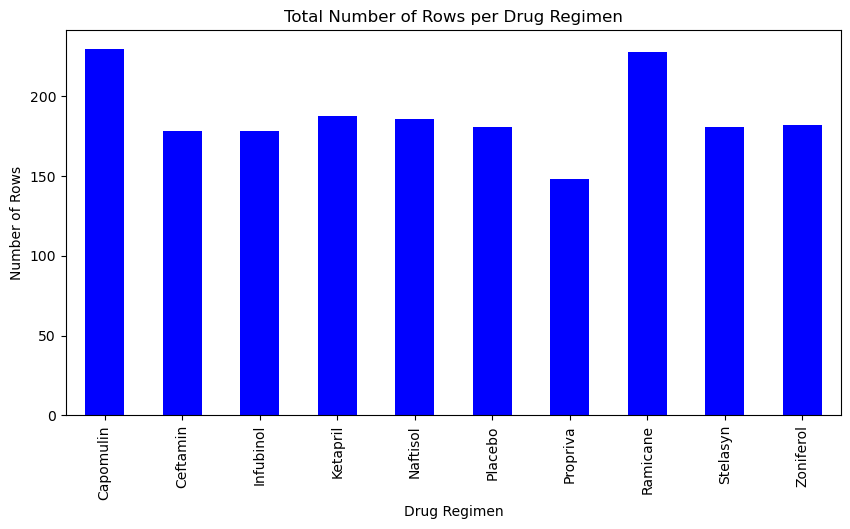

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_barplot = clean_df.groupby('Drug Regimen').size()
drug_barplot.plot(kind='bar', figsize=(10, 5), color='blue')


plt.title('Total Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

plt.show


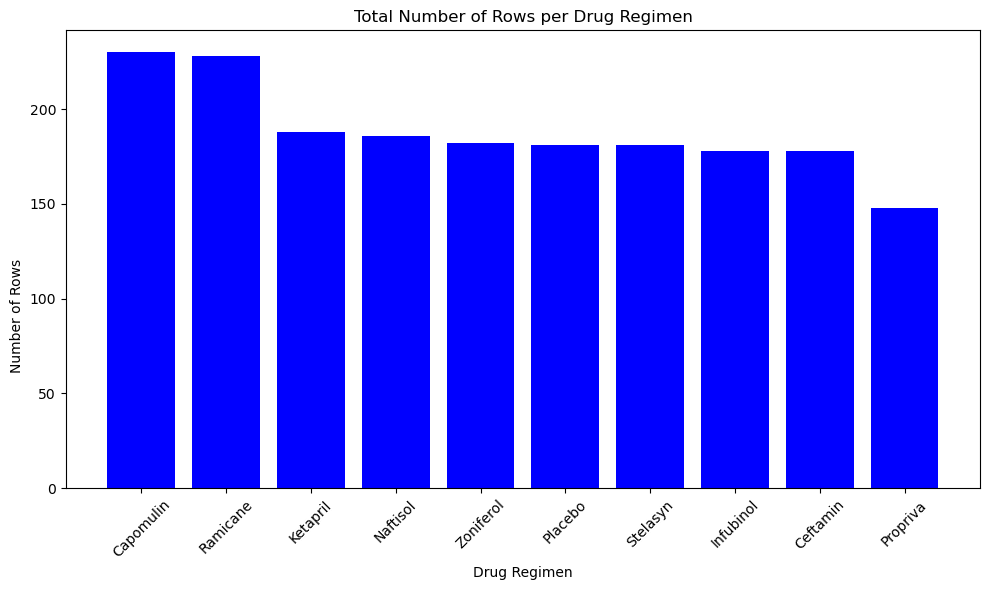

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_df['Drug Regimen'].value_counts()


plt.figure(figsize=(10, 6))
plt.bar(drug_counts.index, drug_counts.values, color='blue')

plt.title('Total Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows', ha='right')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

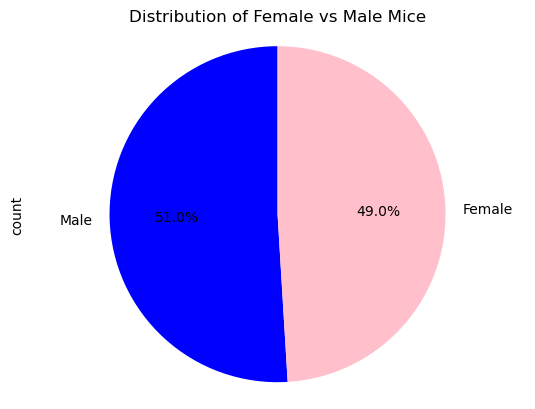

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mice= clean_df['Sex'].value_counts()

sex_mice.plot(kind='pie',autopct='%.1f%%',   startangle=90, colors=['blue', 'pink'])

plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')  

plt.show()

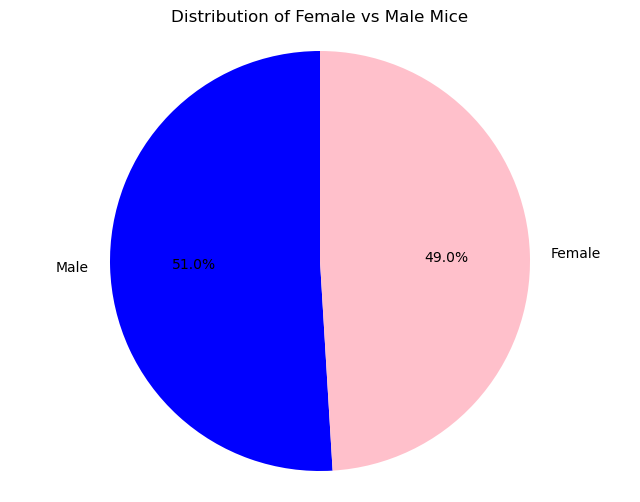

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_mice2 = clean_df['Sex'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sex_mice2, labels=sex_mice.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])


plt.title('Distribution of Female vs Male Mice')

plt.axis('equal')


plt.show()



## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

greatest_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()

last_timepoint_df= clean_df.loc[clean_df['Mouse ID'].isin(greatest_timepoint.index)&clean_df['Timepoint'].isin(greatest_timepoint.values)]

final_tumor_volume_df = last_timepoint_df.loc[last_timepoint_df['Drug Regimen'].isin(treatments)]


final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,45.000000
1,k403,Ramicane,38.825898
2,k403,Ramicane,35.014271
3,k403,Ramicane,34.223992
4,k403,Ramicane,32.997729
...,...,...,...
1868,z581,Infubinol,54.316407
1869,z581,Infubinol,56.286750
1870,z581,Infubinol,58.628399
1871,z581,Infubinol,60.053740


In [18]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = last_timepoint_df.loc[last_timepoint_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_vol_data.append(tumor_vol)
    
    # Calculate and print the interquartile range (IQR)
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    print(f"IQR for {treatment}: {iqr}")

    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"Potential outliers for {treatment}: {outliers}")
outliers



IQR for Capomulin: 7.314067135000002
Potential outliers for Capomulin: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
IQR for Ramicane: 8.325365415
Potential outliers for Ramicane: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
IQR for Infubinol: 10.002090667500006
Potential outliers for Infubinol: Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Ceftamin: 9.593010457500007
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


Series([], Name: Tumor Volume (mm3), dtype: float64)

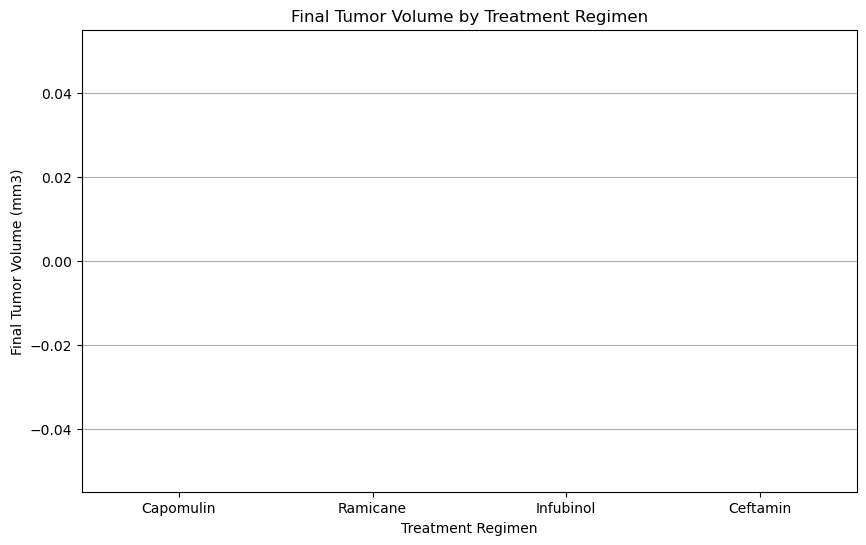

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

tumor_vol_df = pd.DataFrame(tumor_vol_data).T
tumor_vol_df.columns = treatments

# Box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_df.values, labels=treatments)
plt.title('Final Tumor Volume by Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Treatment Regimen')
plt.grid(axis='y')
plt.show()


## Line and Scatter Plots

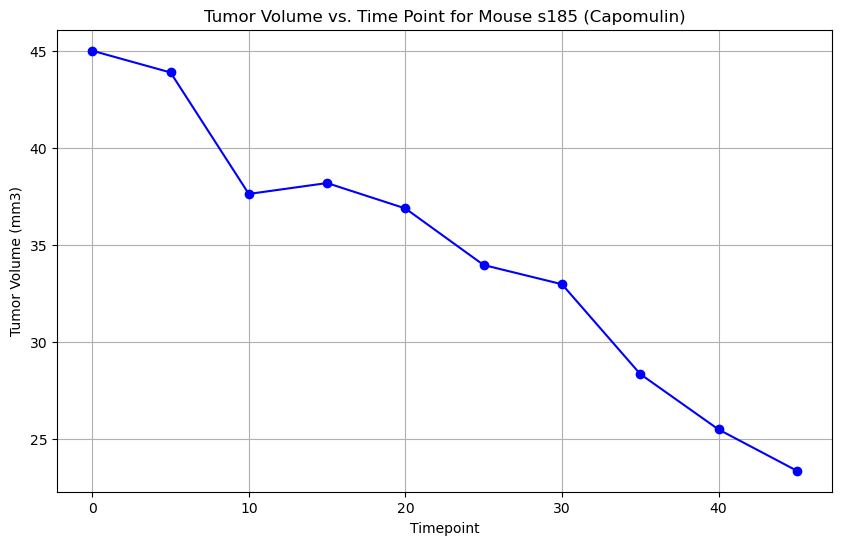

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 's185'
mouse_data = clean_df[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == mouse_id)]

# Plot tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()


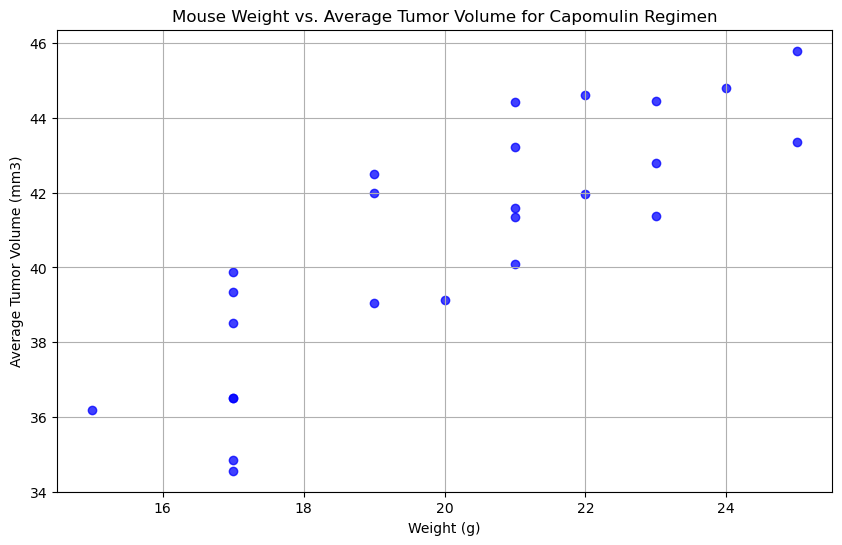

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_data = clean_df.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean', 'Drug Regimen': 'first'}).reset_index()

# Filter the data to include only mice treated with Capomulin
capomulin_data = avg_data.query("`Drug Regimen` == 'Capomulin'")

# Create a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], c='blue', alpha=0.75)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


Correlation Coefficient: 0.8419363424694722


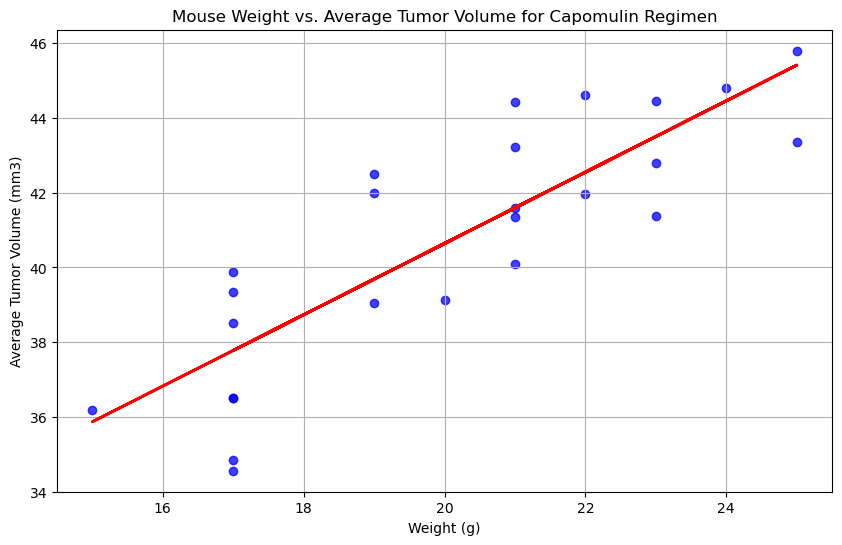

In [27]:




# Calculate the correlation coefficient
correlation_coefficient = capomulin_data['Weight (g)'].corr(capomulin_data['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Calculate the linear regression model
slope, intercept = np.polyfit(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], 1)

# Create the linear regression line
regress_values = slope * capomulin_data['Weight (g)'] + intercept

# Plot the scatter plot and linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], color='blue', alpha=0.75)
plt.plot(capomulin_data['Weight (g)'], regress_values, color='red', linewidth=2)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()
